### Project 1 - Group 2

### Project Title: FIFA Soccer Analysis – insights into European clubs and their players from 2015 to 2021

### Team Members:

###  * Sandhalie Fernando
###  * Cassie Guo
###  * Samy George
###  * Sandy Berahim
###  * Graham Meadon


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

# FIFA data files
FIFA_players_2017_path = "./data/players_17.csv"
FIFA_players_2021_path = "./data/players_21.csv"
pd.options.display.max_columns = 157

# Read the FIFA Players data
FIFA_players_2017_metadata = pd.read_csv(FIFA_players_2017_path)
FIFA_players_2021_metadata = pd.read_csv(FIFA_players_2021_path)

# Combine the data into a single dataset
combined_original_data_df = pd.merge(FIFA_players_2017_metadata, FIFA_players_2021_metadata, on = "sofifa_id", how = "outer", suffixes =("_2017","_2021"))

# Display the data table for preview
combined_original_data_df

,sofifa_id,short_name_2017,long_name_2017,age_2017,dob_2017,height_cm_2017,weight_kg_2017,nationality_2017,club_name_2017,league_name_2017,league_rank_2017,overall_2017,potential_2017,value_eur_2017,wage_eur_2017,player_positions_2017,preferred_foot_2017,international_reputation_2017,weak_foot_2017,skill_moves_2017,work_rate_2017,body_type_2017,real_face_2017,release_clause_eur_2017,player_tags_2017,team_position_2017,team_jersey_number_2017,loaned_from_2017,joined_2017,contract_valid_until_2017,nation_position_2017,nation_jersey_number_2017,pace_2017,shooting_2017,passing_2017,dribbling_2017,defending_2017,physic_2017,gk_diving_2017,gk_handling_2017,gk_kicking_2017,gk_reflexes_2017,gk_speed_2017,gk_positioning_2017,player_traits_2017,attacking_crossing_2017,attacking_finishing_2017,attacking_heading_accuracy_2017,attacking_short_passing_2017,attacking_volleys_2017,skill_dribbling_2017,skill_curve_2017,skill_fk_accuracy_2017,skill_long_passing_2017,skill_ball_control_2017,movement_acceleration_2017,movement_sprint_speed_2017,movement_agility_2017,movement_reactions_2017,movement_balance_2017,power_shot_power_2017,power_jumping_2017,power_stamina_2017,power_strength_2017,power_long_shots_2017,mentality_aggression_2017,mentality_interceptions_2017,mentality_positioning_2017,mentality_vision_2017,mentality_penalties_2017,mentality_composure_2017,defending_marking_2017,defending_standing_tackle_2017,defending_sliding_tackle_2017,goalkeeping_diving_2017,goalkeeping_handling_2017,goalkeeping_kicking_2017,goalkeeping_positioning_2017,goalkeeping_reflexes_2017,short_name_2021,long_name_2021,age_2021,dob_2021,height_cm_2021,weight_kg_2021,nationality_2021,club_name_2021,league_name_2021,league_rank_2021,overall_2021,potential_2021,value_eur_2021,wage_eur_2021,player_positions_2021,preferred_foot_2021,international_reputation_2021,weak_foot_2021,skill_moves_2021,work_rate_2021,body_type_2021,real_face_2021,release_clause_eur_2021,player_tags_2021,team_position_2021,team_jersey_number_2021,loaned_from_2021,joined_2021,contract_valid_until_2021,nation_position_2021,nation_jersey_number_2021,pace_2021,shooting_2021,passing_2021,dribbling_2021,defending_2021,physic_2021,gk_diving_2021,gk_handling_2021,gk_kicking_2021,gk_reflexes_2021,gk_speed_2021,gk_positioning_2021,player_traits_2021,attacking_crossing_2021,attacking_finishing_2021,attacking_heading_accuracy_2021,attacking_short_passing_2021,attacking_volleys_2021,skill_dribbling_2021,skill_curve_2021,skill_fk_accuracy_2021,skill_long_passing_2021,skill_ball_control_2021,movement_acceleration_2021,movement_sprint_speed_2021,movement_agility_2021,movement_reactions_2021,movement_balance_2021,power_shot_power_2021,power_jumping_2021,power_stamina_2021,power_strength_2021,power_long_shots_2021,mentality_aggression_2021,mentality_interceptions_2021,mentality_positioning_2021,mentality_vision_2021,mentality_penalties_2021,mentality_composure_2021,defending_marking_2021,defending_standing_tackle_2021,defending_sliding_tackle_2021,goalkeeping_diving_2021,goalkeeping_handling_2021,goalkeeping_kicking_2021,goalkeeping_positioning_2021,goalkeeping_reflexes_2021
0,20801,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,31.0,5/02/1985,185.0,80.0,Portugal,Real Madrid,Spain Primera Division,1.0,94.0,94.0,87000000.0,575000.0,"LW, LM, ST",Right,5.0,4.0,5.0,High/Low,C. Ronaldo,Yes,NaN,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,1/07/2009,2018.0,LS,7.0,92.0,92.0,81.0,91.0,33.0,80.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Flair, Long Shot Taker (AI), ...",84.0,93.0,87.0,82.0,88.0,93.0,81.0,77.0,72.0,92.0,91.0,92.0,90.0,96.0,63.0,94.0,95.0,92.0,80.0,92.0,63.0,29.0,94.0,85.0,85.0,86.0,22.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35.0,5/02/1985,187.0,83.0,Portugal,Juventus,Italian Serie A,1.0,92.0,92.0,46000000.0,220000.0,"ST, LW",Right,5.0,4.0,5.0,High/Low,C. Ronaldo,Yes,75900000.0,"#Aerial Threat, #Dribbler, #Distance Shooter, ...",LS,7

In [2]:
# Read the FIFA Players data
df=pd.DataFrame(FIFA_players_2021_metadata)
df

,sofifa_id,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,league_name,league_rank,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,158023,L. Messi,Lionel Andrés Messi Cuccittini,33,24/06/1987,170,72,Argentina,FC Barcelona,Spain Primera Division,1.0,93,93,67500000,560000,"RW, ST, CF",Left,5,4,4,Medium/Low,Messi,Yes,138400000.0,"#Dribbler, #Distance Shooter, #FK Specialist, ...",CAM,10.0,NaN,1/07/2004,2021.0,RW,10.0,85.0,92.0,91.0,95.0,38.0,65.0,NaN,NaN,NaN,NaN,NaN,NaN,"Finesse Shot, Long Shot Taker (AI), Speed Drib...",85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,NaN,35,24,6,11,15,14,8
1,20801,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35,5/02/1985,187,83,Portugal,Juventus,Italian Serie A,1.0,92,92,46000000,220000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,75900000.0,"#Aerial Threat, #Dribbler, #Distance Shooter, ...",LS,7.0,NaN,10/07/2018,2022.0,LS,7.0,89.0,93.0,81.0,89.0,35.0,77.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Flair, Long Shot Taker (AI), ...",84,95,90,82,86,88,81,76,77,92,87,91,87,95,71,94,95,84,78,93,63,29,95,82,84,95,NaN,32,24,7,11,15,14,11
2,200389,J. Oblak,Jan Oblak,27,7/01/1993,188,87,Slovenia,Atlético Madrid,Spain Primera Division,1.0,91,93,75000000,125000,GK,Right,3,3,1,Medium/Medium,PLAYER_BODY_TYPE_259,Yes,159400000.0,NaN,GK,13.0,NaN,16/07/2014,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,90.0,52.0,90.0,"GK Long Throw, Comes For Crosses",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,NaN,12,18,87,92,78,90,90
3,188545,R. Lewandowski,Robert Lewandowski,31,21/08/1988,184,80,Poland,FC Bayern München,German 1. Bundesliga,1.0,91,91,80000000,240000,ST,Right,4,4,4,High/Medium,PLAYER_BODY_TYPE_276,Yes,132000000.0,"#Distance Shooter, #Clinical Finisher",ST,9.0,NaN,1/07/2014,2023.0,NaN,NaN,78.0,91.0,78.0,85.0,43.0,82.0,NaN,NaN,NaN,NaN,NaN,NaN,"Solid Player, Finesse Shot, Outside Foot Shot,...",71,94,85,84,89,85,79,85,70,88,77,78,77,93,82,89,84,76,86,85,81,49,94,79,88,88,NaN,42,19,15,6,12,8,10
4,190871,Neymar Jr,Neymar da Silva Santos Júnior,28,5/02/1992,175,68,Brazil,Paris Saint-Germain,French Ligue 1,1.0,91,91,90000000,270000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,166500000.0,"#Speedster, #Dribbler, #Playmaker, #FK Special...",LW,10.0,NaN,3/08/2017,2022.0,NaN,NaN,91.0,85.0,86.0,94.0,36.0,59.0,NaN,NaN,NaN,NaN,NaN,NaN,"Injury Prone, Flair, Speed Dribbler (AI), Outs...",85,87,62,87,87,95,88,89,81,95,94,89,96,91,83,80,62,81,50,84,51,36,87,90,92,93,NaN,30,29,9,9,15,15,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18939,256679,K. Angulo,Kevin Angulo,24,13/04/1996,176,73,Colombia,América de Cali,Colombian Liga Postobón,1

In [3]:
#get the header of columns
df.columns

Index(['sofifa_id', 'short_name', 'long_name', 'age', 'dob', 'height_cm',
       'weight_kg', 'nationality', 'club_name', 'league_name', 'league_rank',
       'overall', 'potential', 'value_eur', 'wage_eur', 'player_positions',
       'preferred_foot', 'international_reputation', 'weak_foot',
       'skill_moves', 'work_rate', 'body_type', 'real_face',
       'release_clause_eur', 'player_tags', 'team_position',
       'team_jersey_number', 'loaned_from', 'joined', 'contract_valid_until',
       'nation_position', 'nation_jersey_number', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
       'gk_positioning', 'player_traits', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acce

In [4]:
#check whether duplicate inputs appear
df['sofifa_id'].nunique()  # there is no duplicate inputs

18944

In [5]:
#list all club names in this dataset
df['club_name'].nunique()

681

## Calculate and add BMI to dataset

In [6]:
# Creat a new datafram with keeping 'ID','Club', 'Wage','Overall', 'Potential' 
df1=df.loc[:, ('club_name', 'wage_eur','overall', 'potential', 'age', 'height_cm','weight_kg')]

#calucate BMI for team players

bmi=df1['weight_kg']/(df1['height_cm']/100)**2

df1['BMI'] =bmi
df1

,club_name,wage_eur,overall,potential,age,height_cm,weight_kg,BMI
0,FC Barcelona,560000,93,93,33,170,72,24.913495
1,Juventus,220000,92,92,35,187,83,23.735308
2,Atlético Madrid,125000,91,93,27,188,87,24.615211
3,FC Bayern München,240000,91,91,31,184,80,23.629490
4,Paris Saint-Germain,270000,91,91,28,175,68,22.204082
...,...,...,...,...,...,...,...,...
18939,América de Cali,500,47,52,24,176,73,23.566632
18940,Chongqing Dangdai Lifan FC SWM Team,1000,47,52,21,177,70,22.343516
18941,Tianjin TEDA FC,1000,47,51,20,185,74,21.621622
18942,Shijiazhuang Ever Bright F.C.,1000,47,51,23,186,80,23.124061


## Overall EDA in Year 2021

array([[<Axes: xlabel='wage_eur', ylabel='wage_eur'>,
        <Axes: xlabel='overall', ylabel='wage_eur'>,
        <Axes: xlabel='potential', ylabel='wage_eur'>,
        <Axes: xlabel='age', ylabel='wage_eur'>,
        <Axes: xlabel='height_cm', ylabel='wage_eur'>,
        <Axes: xlabel='weight_kg', ylabel='wage_eur'>,
        <Axes: xlabel='BMI', ylabel='wage_eur'>],
       [<Axes: xlabel='wage_eur', ylabel='overall'>,
        <Axes: xlabel='overall', ylabel='overall'>,
        <Axes: xlabel='potential', ylabel='overall'>,
        <Axes: xlabel='age', ylabel='overall'>,
        <Axes: xlabel='height_cm', ylabel='overall'>,
        <Axes: xlabel='weight_kg', ylabel='overall'>,
        <Axes: xlabel='BMI', ylabel='overall'>],
       [<Axes: xlabel='wage_eur', ylabel='potential'>,
        <Axes: xlabel='overall', ylabel='potential'>,
        <Axes: xlabel='potential', ylabel='potential'>,
        <Axes: xlabel='age', ylabel='potential'>,
        <Axes: xlabel='height_cm', ylabel='potenti

<Figure size 1200x1200 with 0 Axes>

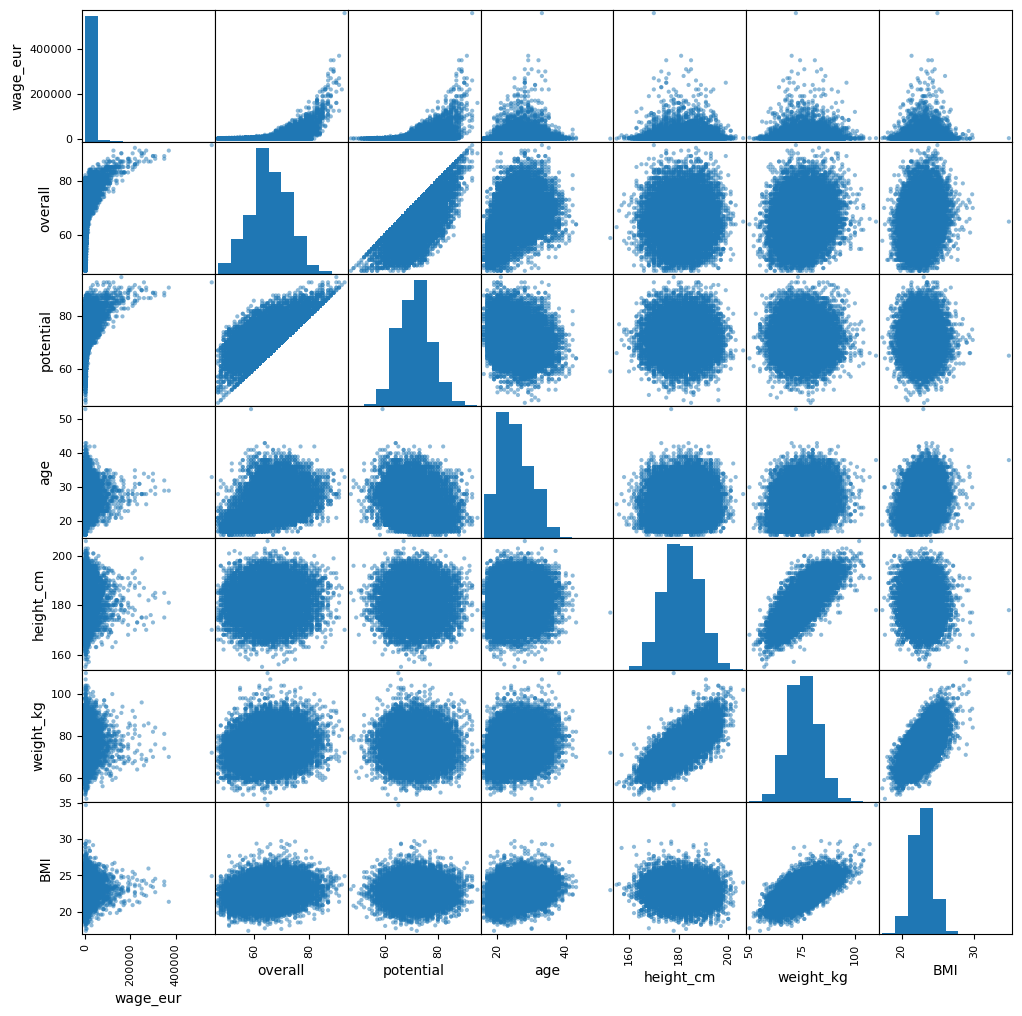

In [7]:
plt.figure(figsize=(12,12))
ax = pd.plotting.scatter_matrix(df1,figsize=(12,12)) 
display(ax)

In [8]:
df1.describe(include='all')

,club_name,wage_eur,overall,potential,age,height_cm,weight_kg,BMI
count,18719,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000
unique,681,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,FC Barcelona,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,8675.852513,65.677787,71.086729,25.225823,181.190773,75.016892,22.822116
std,NaN,19654.774894,7.002278,6.109985,4.697354,6.825672,7.057140,1.358890
min,NaN,0.000000,47.000000,47.000000,16.000000,155.000000,50.000000,17.358919
25%,NaN,1000.000000,61.000000,67.000000,21.000000,176.000000,70.000000,21.913806
50%,NaN,3000.000000,66.000000,71.000000,25.000000,181.000000,75.000000,22.837370
75%,NaN,7000.000000,70.000000,75.000000,29.000000,186.000000,80.000000,23.671254


## Performance v.s. Wage (Curve Fitting)

In [9]:
import scipy
from scipy.stats import linregress as lgs
from scipy.optimize import curve_fit
#temp = df1[(df1['wage_eur'] >=  df1['wage_eur'].quantile(.05))].copy()
temp=df1
temp.head()


,club_name,wage_eur,overall,potential,age,height_cm,weight_kg,BMI
0,FC Barcelona,560000,93,93,33,170,72,24.913495
1,Juventus,220000,92,92,35,187,83,23.735308
2,Atlético Madrid,125000,91,93,27,188,87,24.615211
3,FC Bayern München,240000,91,91,31,184,80,23.629490
4,Paris Saint-Germain,270000,91,91,28,175,68,22.204082


In [10]:
trend = np.polyfit(temp['wage_eur'].values, temp['overall'].values, 2)
trendpoly = np.poly1d(trend)

In [11]:

#https://stackoverflow.com/questions/49944018/fit-a-logarithmic-curve-to-data-points-and-extrapolate-out-in-numpy
def log_fit(x, a,b,c,d):
    return a*np.log(b*x+c)+d

param = curve_fit(log_fit, temp['wage_eur'], temp['overall'])
func_param = param[0]

/Users/cassie/opt/anaconda3/envs/dev/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [12]:
func_param
#logarithm function
log_func_str = f"Y = {func_param[0]:.2f}*log({func_param[1]:.2f}X + {func_param[2]:.2f}) + {func_param[3]:.2f}"
log_func_str

'Y = 6.26*log(0.28X + 697.46) + 18.53'

Fitted Function:  Y = 6.26*log(0.28X + 697.46) + 18.53


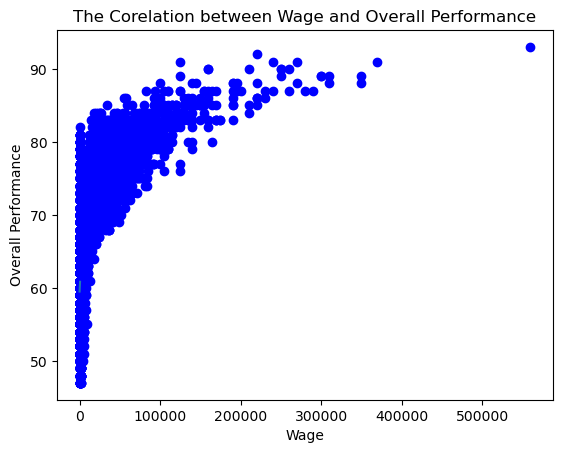

Wage (€) for Overall Performance (Per score)= 132.0972110593152


In [13]:
print('Fitted Function: ', log_func_str)
plt.scatter(temp['wage_eur'], temp['overall'], color='blue')
lin_x = np.linspace(0,600,num=10000)

plt.xlabel("Wage")
plt.ylabel("Overall Performance")
plt.title("The Corelation between Wage and Overall Performance")
plt.plot(lin_x, log_fit(lin_x, *func_param))
plt.savefig('./png/wage_Overall.png', transparent=True)
plt.show()
print(f"Wage (€) for Overall Performance (Per score)= {temp['wage_eur'].sum()/ temp['overall'].sum()}")

## Correlation between wage & Overall Performance 

In [14]:
#the Corelation between overall performance and wage 
corr_wage_overall = st.pearsonr(temp['wage_eur'],temp['overall'])
print(f"The correlation between overall performace and their wage: \n r-value={round(corr_wage_overall[0],2)}, p-value={round(corr_wage_overall[1],2)}")

The correlation between overall performace and their wage: 
 r-value=0.57, p-value=0.0


## Average Wage & Overall Performance

In [15]:
# groupby the overall performace with range 10 to calculate the average wage team received
df1['overall'].value_counts(bins=5)

(56.2, 65.4]      7530
(65.4, 74.6]      7524
(74.6, 83.8]      1901
(46.953, 56.2]    1849
(83.8, 93.0]       140
Name: overall, dtype: int64

In [16]:
print(df1['overall'].min())
print(df1['overall'].max())

47
93


In [17]:
#cut the total data into bins
bin_overall=[45,60,65,70,75,80,85,90,95]
label_overall=['<=60',
               '60-65',
               '65-70',
               '70-75',
               '75-80',
               '80-85',
               '85-90',
               '>=90']
bin_data=pd.cut(df1['overall'],bins=bin_overall)
pd.value_counts(bin_data)


(60, 65]    5124
(65, 70]    5053
(45, 60]    4255
(70, 75]    3014
(75, 80]    1132
(80, 85]     304
(85, 90]      56
(90, 95]       6
Name: overall, dtype: int64

In [18]:
new_df=pd.DataFrame()
new_df['Overall Range']=pd.cut(df1['overall'],bins=bin_overall,labels=label_overall)
new_df['Average Wage']=df1['wage_eur']
new_df=new_df.groupby('Overall Range').mean().round(0)
new_df['Quantity of Club']=['4255',
                             '5124',
                             '5053',
                             '3014',
                             '1132',
                             '304',
                             '56',
                             '6']
new_df




,Average Wage,Quantity of Club
Overall Range,,
<=60,1273.0,4255
60-65,2153.0,5124
65-70,5366.0,5053
70-75,15510.0,3014
75-80,34492.0,1132
80-85,74472.0,304
85-90,188875.0,56
>=90,297500.0,6


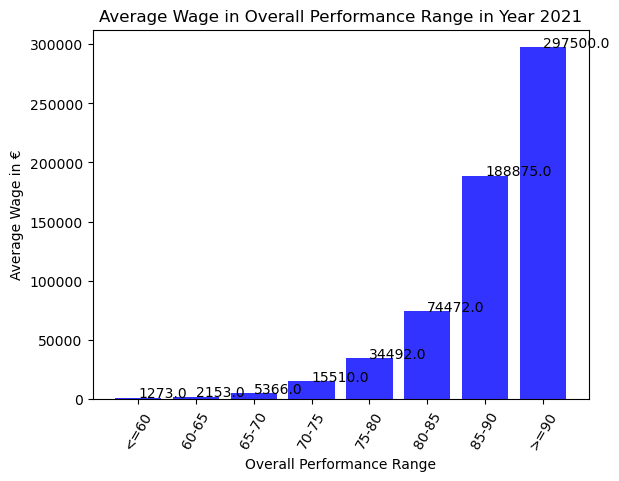

In [19]:
# Generate a bar plot showing average wage for Overall Performance in specific Range using pyplot.

x_axis = new_df['Average Wage'].index.values
y1_axis = new_df['Average Wage'].values
y2_axis = new_df['Quantity of Club'].values
# Create a Pyplot bar plot based off of the group series from before and label the title
plt.bar(x_axis, y1_axis, color='b', alpha=0.8, align='center')

# Set the xlabel and ylabel, title using class methods
plt.xlabel("Overall Performance Range")
plt.ylabel("Average Wage in €")
plt.title("Average Wage in Overall Performance Range in Year 2021")
plt.xticks(rotation=60)
for i, val in enumerate(y1_axis):
    plt.text(i, val, str(val))
plt.tight_layout
plt.savefig('./png/Avgwage_in Range.png', transparent=True)
plt.show()


## Wage v.s Age

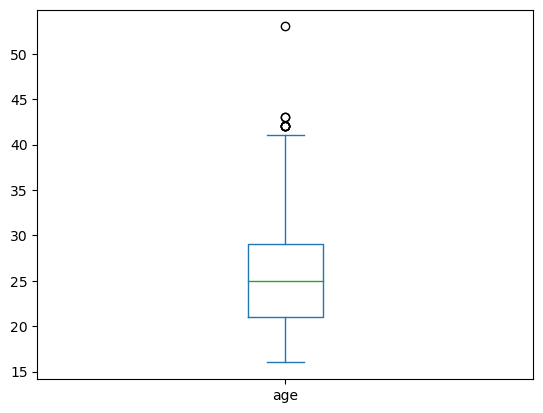

In [20]:
df['age'].plot(kind='box')
plt.savefig('./png/Age_Wage 1-1.png', transparent=True)

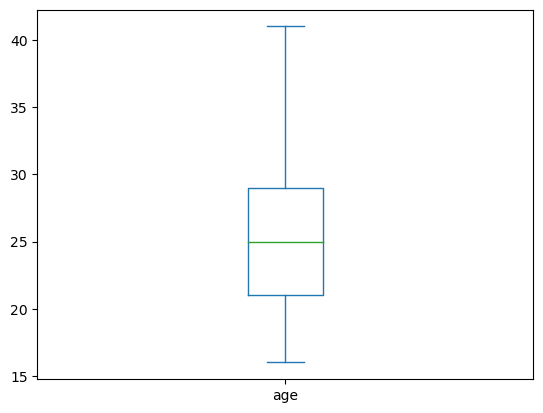

In [21]:
## check if 42 is dropping outliers
df[df['age'] < 42]['age'].plot(kind='box')
plt.savefig('./png/Age_Wage 1-2.png', transparent=True)

In [22]:
#drop outliers
temp_2= df[df['age'] < 42]


## Average Age & Wage

Average wage of the group in Year 2021 is: €8675.67


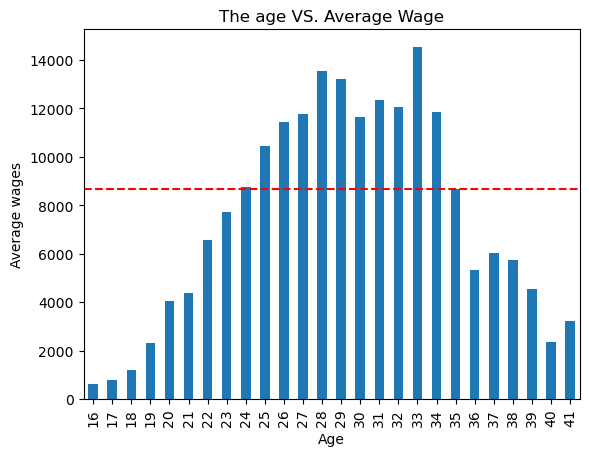

In [23]:
temp_2.groupby(['age'])['wage_eur'].mean().plot(kind='bar')
plt.xlabel("Age")
plt.ylabel("Average wages")
plt.title("The age VS. Average Wage")
plt.axhline(y=temp_2['wage_eur'].mean(), color='r', ls='--')
plt.savefig('./png/Age_AveWage.png', transparent=True)
plt.show
print("Average wage of the group in Year 2021 is: €" + str(temp_2['wage_eur'].mean().round(2)))

## EDA for Average date across Clubs

In [24]:
#Regroup date by clubs
avg_df1=df1.groupby(['club_name']).mean()
pd.DataFrame(avg_df1)

,wage_eur,overall,potential,age,height_cm,weight_kg,BMI
club_name,,,,,,,
1. FC Heidenheim 1846,8316.666667,66.266667,71.433333,24.533333,183.866667,79.400000,23.463569
1. FC Kaiserslautern,1478.571429,62.785714,68.821429,23.892857,182.892857,77.464286,23.131885
1. FC Köln,15200.000000,70.266667,76.700000,24.266667,185.433333,79.033333,22.965159
1. FC Magdeburg,1151.851852,62.074074,68.000000,24.222222,185.074074,78.185185,22.808573
1. FC Nürnberg,4933.333333,66.833333,72.866667,24.800000,182.833333,79.166667,23.652502
...,...,...,...,...,...,...,...
Zamora FC,500.000000,59.035714,64.892857,24.392857,175.142857,69.392857,22.622786
Çaykur Rizespor,6433.333333,67.000000,70.133333,26.666667,181.833333,75.733333,22.882342
Örebro SK,1113.461538,60.884615,65.692308,25.423077,182.653846,75.692308,22.691213


In [25]:
# get the top n team by the Overall Performace
overall_df=avg_df1.sort_values('overall', ascending=False)
pd.DataFrame(overall_df.head(10))


,wage_eur,overall,potential,age,height_cm,weight_kg,BMI
club_name,,,,,,,
FC Bayern München,81909.090909,81.045455,85.727273,25.227273,185.772727,80.409091,23.270475
Real Madrid,151500.000000,79.250000,84.781250,24.906250,180.812500,76.062500,23.223049
Chelsea,81757.575758,79.212121,83.030303,25.575758,182.878788,79.636364,23.785306
FC Barcelona,143575.757576,78.909091,84.939394,24.848485,179.848485,73.030303,22.533018
Liverpool,95575.757576,78.575758,84.060606,25.000000,181.393939,74.606061,22.633994
Inter,84121.212121,78.000000,82.303030,27.060606,182.757576,75.454545,22.564200
Manchester United,89393.939394,77.818182,82.606061,25.121212,183.969697,76.000000,22.401219
Manchester City,114090.909091,77.484848,83.515152,24.636364,180.818182,74.363636,22.720450
Juventus,69709.677419,77.483871,82.161290,26.129032,184.258065,78.806452,23.193787


In [26]:
df1['BMI'].max()

34.71783865673526

In [27]:
#the Corelation between overall performance and wage 
corr_wage_overall = st.pearsonr(overall_df['wage_eur'],overall_df['overall'])
print(f"The correlation between overall performace and the average wage: \n r-value={round(corr_wage_overall[0],2)}, p-value={round(corr_wage_overall[1],2)}")

The correlation between overall performace and the average wage: 
 r-value=0.67, p-value=0.0


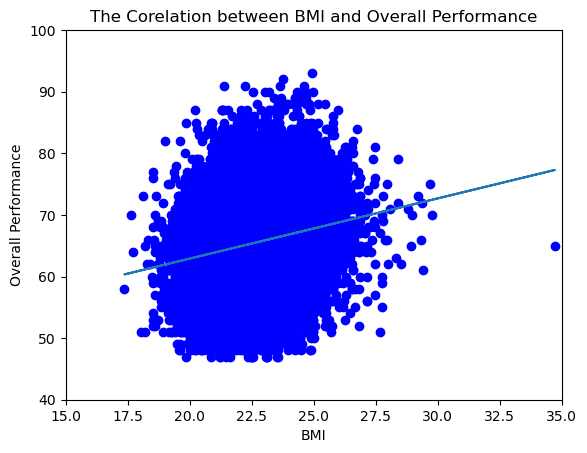

In [28]:
#Test the corelation between 'BMI' and 'Overall Performance' with Scatterplot

overall_p=df1['overall']
avg_overall_p=np.mean(overall_p)

(slope, intercept, rvalue,pvalue, stderr)= lgs(bmi,overall_p)
regression2=bmi*slope+intercept

line_eq2= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(bmi, overall_p, color='blue')
plt.plot(bmi,regression2)
plt.xlim([15,35])
plt.ylim([40,100])
#plt.annotate(line_eq,(8,8), fontsize=15)
plt.xlabel("BMI")
plt.ylabel("Overall Performance")
plt.title("The Corelation between BMI and Overall Performance")
plt.savefig('./png/BMI_Performace.png', transparent=True)
plt.show()

In [29]:
# Calculate and print the correlation coefficient for overall performance and age
corr_bmi_overall= st.pearsonr(df1['BMI'],df1['overall'])

print(f"The correlation between overall performace and BMI: r-value= {round(corr_bmi_overall[0],2)}, p-value={round(corr_bmi_overall[1],2)},")

The correlation between overall performace and BMI: r-value= 0.19, p-value=0.0,


## 